### 🦠 **Tracking an Antimicrobial Resistance Outbreak**

In this interactive case study, you'll simulate the response to an AMR (Antimicrobial Resistance) outbreak in a hospital. You'll use Python fundamentals to manage sample data, analyze gene expression, classify bacterial strains, and summarize the outbreak using functions, objects, and NumPy.


In [1]:
## Import required packages 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import urllib3
import os
import seaborn as sns

In [2]:
# Create a directory to save the data
os.makedirs('Data', exist_ok=True)

Data_URLS = {
    'Clinical_Data.csv': 'https://raw.githubusercontent.com/Nery-MC/LSI/main/Coding%20Workshop/Clinical_Data.csv',
    'Lab_Processing_Data.csv': 'https://raw.githubusercontent.com/Nery-MC/LSI/main/Coding%20Workshop/Lab_Processing_Data.csv',
    'Cattle_Farm_Data.csv': 'https://raw.githubusercontent.com/Nery-MC/LSI/main/Coding%20Workshop/Cattle_Farm_Data.csv', 
    'RESISTANCE_GENES.txt': 'https://raw.githubusercontent.com/Nery-MC/LSI/main/Coding%20Workshop/RESISTANCE_GENES.txt'
}

http = urllib3.PoolManager()

# Download and save each file
for Filename, URL in Data_URLS.items():
    print(f'Downloading {Filename} from {URL} ...')
    Response = http.request('GET', URL)
    if Response.status == 200:
        with open(f'Data/{Filename}', 'wb') as f:
            f.write(Response.data)
        print(f'Downloaded: {Response}')
    else:
        print(f'Failed to download {Response} (Status: {Response.status})')

print('All files saved to "./Data/" folder.')

Downloaded: <urllib3.response.HTTPResponse object at 0x0000020373868E20>
Downloaded: <urllib3.response.HTTPResponse object at 0x0000020314839BD0>
Downloaded: <urllib3.response.HTTPResponse object at 0x0000020373868E20>
Downloaded: <urllib3.response.HTTPResponse object at 0x0000020373868340>
All files saved to "./Data/" folder.


In [3]:
## 1. Extracting data for analysis
Clinical_Data = pd.read_csv('./Data/Clinical_Data.csv', header = 0)
print('Clinical Dataset')
print(f'Clinical Data Shape: {Clinical_Data.shape}')
display(Clinical_Data)

Laboratory_Data = pd.read_csv('./Data/Lab_Processing_Data.csv', header = 0)
print('Laboratory Processing Dataset')
print(f'Lab Data Shape: {Laboratory_Data.shape}')
display(Laboratory_Data)


Clinical Dataset
Clinical Data Shape: (800, 8)


,Patient ID,Sex,Age,Unit,Diagnosis,Treatment,Outcome,Hospital_Duration
0,2200,Female,75,ICU-2,Drug-resistant TB,Ethambutol,Deceased,33
1,2201,Male,52,ICU-3,Drug-resistant TB,Isoniazid,Recovered,39
2,2202,Female,71,ICU-1,Drug-resistant TB,Streptomycin,Recovered,58
3,2203,Female,67,PCU,Drug-resistant TB,NaN,Recovered,39
4,2204,Female,39,PCU,Drug-resistant TB,Kanamycin,Recovered,13
...,...,...,...,...,...,...,...,...
795,2995,Male,21,ED,Drug-resistant TB,NaN,Ongoing,57
796,2996,Female,72,PCU,Drug-resistant TB,Rifampicin,Ongoing,11
797,2997,Male,51,ICU-1,Drug-resistant TB,NaN,Ongoing,46
798,2998,Female,51,Med-Surg,Drug-resistant TB,Isoniazid,Deceased,43


Laboratory Processing Dataset
Lab Data Shape: (800, 14)


,Patient ID,Collection Date,Sample Site,Strain,Strain ID,Resistance Genes,Gene Expression Levels,MLST,Genome Coverage,Sample Quality Score,Sequencing Platform,Growth Media,Library Prep Protocol,Incubation Time [HR]
0,2200,2025-04-19,CSF,Mycobacterium tuberculosis var. bovis AF2122/97,bTB-R1,['aac(2)-Ic'],{'aac(2)-Ic': 581.59},ST28,97.70,34.85,Illumina MiSeq,Middlebrook agar,TruSeq DNA,42
1,2201,2025-04-19,Blood,Mycobacterium tuberculosis var. bovis AF2122/97,bTB-R1,['aac(2)-Ic'],{'aac(2)-Ic': 485.33},ST44,96.87,37.06,Illumina MiSeq,7H9 broth,Nextera XT,30
2,2202,2025-04-19,Lung Biopsy,Mycobacterium tuberculosis var. bovis AF2122/97,bTB-R1,['aac(2)-Ic'],{'aac(2)-Ic': 659.21},ST32,98.48,37.66,Oxford Nanopore,Middlebrook agar,Ligation Sequencing Kit,18
3,2203,2025-04-19,CSF,Mycobacterium tuberculosis var. bovis AF2122/97,bTB-R1,['aac(2)-Ic'],{'aac(2)-Ic': 689.71},ST31,92.18,32.19,PacBio,Middlebrook agar,Ligation Sequencing Kit,46
4,2204,2025-04-19,CSF,Mycobacterium tuberculosis var. bovis AF2122/97,bTB-R1,['aac(2)-Ic'],{'aac(2)-Ic': 803.51},ST39,95.59,30.27,PacBio,7H9 broth,TruSeq DNA,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2995,2025-04-19,CSF,Mycobacterium tuberculosis var. bovis AF2122/97,bTB-R1,['aac(2)-Ic'],{'aac(2)-Ic': 649.86},ST42,98.14,37.69,Illumina MiSeq,Lowenstein-Jensen,TruSeq DNA,44
796,2996,2025-04-19,Sputum,Mycobacterium tuberculosis var. bovis AF2122/97,bTB-R1,['aac(2)-Ic'],{'aac(2)-Ic': 636.91},ST40,91.67,34.13,Oxford Nanopore,Middlebrook agar,Nextera XT,41
797,2997,2025-04-19,Blood,Mycobacterium tuberculosis var. bovis AF2122/97,bTB-R1,['aac(2)-Ic'],{'aac(2)-Ic': 638.34},ST31,97.45,37.57,Illumina MiSeq,Lowenstein-Jensen,Ligation Sequencing Kit,33
798,2998,2025-04-19,Blood,Mycobacterium tuberculosis var. bovis AF2122/97,bTB-R1,['aac(2)-Ic'],{'aac(2)-Ic': 759.95},ST29,90.26,38.80,Illumina MiSeq,7H9 broth,Ligation Sequencing Kit,27


In [4]:
# Checkpoint
assert isinstance(Clinical_Data, pd.DataFrame), 'Clinical Data should be a data frame!'
assert isinstance(Laboratory_Data, pd.DataFrame), 'Laboratory Data should be a data frame!'
print('✔️ Sample metadata recorded successfully.')

✔️ Sample metadata recorded successfully.


When the data was processed you can see traces of the datatypes they used to save the data in the dataframe. Since we first converted the .csv file into a pd.DataFrame we also changed the datatype of all of the collection types into ``str`` datatypes. So our first job is to convert these text datatypes into their original collection datatypes. Thankfully, there is a function that already does that: 

**``ast.literal_eval``** 

In [5]:
import ast
Laboratory_Data['Gene Expression Levels'] = Laboratory_Data['Gene Expression Levels'].apply(ast.literal_eval)

# Create a new list to hold each row of genetic information
Gene_List = [] 

def Classify_Samples(Expression_Level): 
    if Expression_Level > 500: 
        Category = 'High'
    else: 
        Category = 'Normal'
    return Category

# Loop through each row in the DataFrame 
for i in range(len(Laboratory_Data)): 
    Patient_ID = Laboratory_Data.loc[i, 'Patient ID']
    Strain = Laboratory_Data.loc[i, 'Strain']
    Expression_Dict = Laboratory_Data.loc[i, 'Gene Expression Levels']

    Laboratory_Data['Collection Date'] = pd.to_datetime(Laboratory_Data['Collection Date'])
    Collection_Date = Laboratory_Data.loc[i, 'Collection Date']

    # Loop through each gene in the dictionary 
    for Gene_Name in Expression_Dict: 
        Expression_Level = Expression_Dict[Gene_Name]

        Category = Classify_Samples(Expression_Level)
        
        # Add the results to the list 
        Gene_List.append({
            'Patient ID': Patient_ID, 
            'Collection Date': Collection_Date,
            'Strain': Strain, 
            'Gene': Gene_Name, 
            'Expression Level': Expression_Level, 
            'Expression Category': Category
            })

# Exit out of the loop and convert the list into a new DataFrame 
Gene_Expression = pd.DataFrame(Gene_List)

In [6]:
assert isinstance(Gene_Expression, pd.DataFrame), 'Must be a DataFrame!'
#assert Gene_Expression.shape == (623, 6), 'Check number of parameters!'
print('✔️ Expression level logic complete.')

✔️ Expression level logic complete.


In [7]:
display(Gene_Expression)

,Patient ID,Collection Date,Strain,Gene,Expression Level,Expression Category
0,2200,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,581.59,High
1,2201,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,485.33,Normal
2,2202,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,659.21,High
3,2203,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,689.71,High
4,2204,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,803.51,High
...,...,...,...,...,...,...
923,2995,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,649.86,High
924,2996,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,636.91,High
925,2997,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,638.34,High
926,2998,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,759.95,High


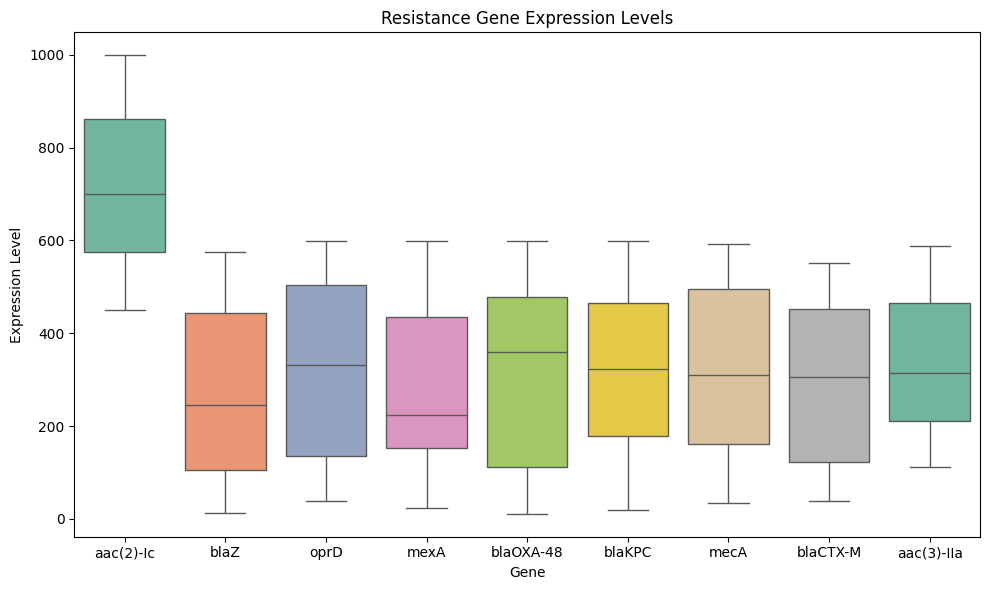

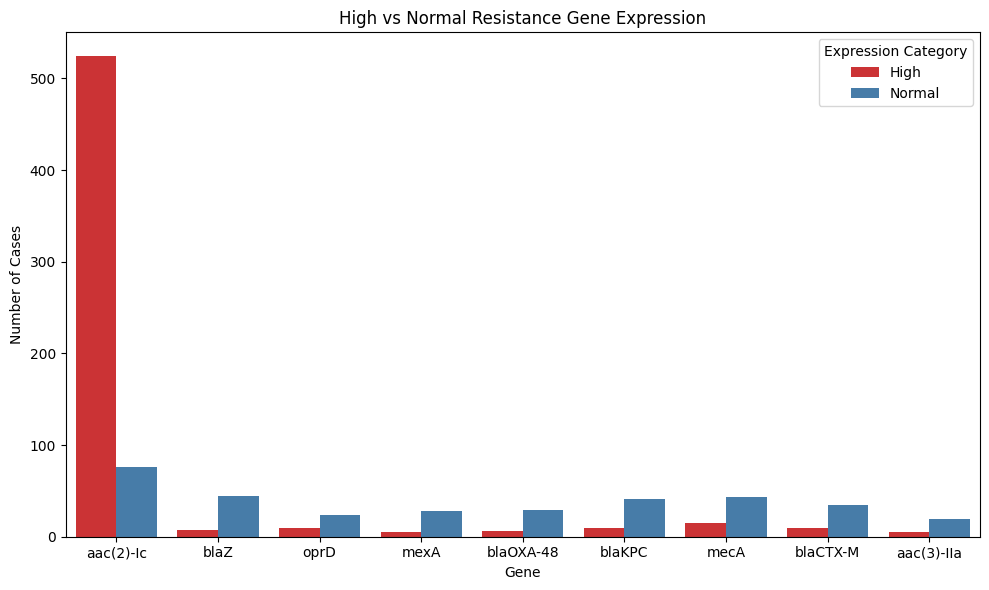

In [8]:
# ------------------ PLOT 1: Expression Level Boxplot ------------------
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Gene', hue = 'Gene', y = 'Expression Level', data = Gene_Expression, palette = 'Set2')
plt.title('Resistance Gene Expression Levels')
plt.tight_layout()
plt.show()

# ------------------ PLOT 2: High vs Normal Expression Counts ------------------
plt.figure(figsize=(10, 6))
sns.countplot(x = 'Gene', hue = 'Expression Category', data = Gene_Expression, palette = 'Set1')
plt.ylabel('Number of Cases')
plt.title('High vs Normal Resistance Gene Expression')
plt.tight_layout()
plt.show()

WOW! There seems to be a very high expressin level compared to normal expression! Lets now see if there are any correlations with clinical data. Let try to add relevent clinical data to the gene expression dataframe and see what the results are. 

How should we go about this? 
When it comes to data, what would we data point could we use to merge the data together between the two data sets.
Both have ``Patient ID`` 

In [9]:
Relevent_Clinical = Clinical_Data[['Patient ID', 'Unit', 'Outcome', 'Diagnosis']]

Expression_w_Clinical = Gene_Expression.merge(Relevent_Clinical, on = 'Patient ID', how = 'left')
display(Expression_w_Clinical)

,Patient ID,Collection Date,Strain,Gene,Expression Level,Expression Category,Unit,Outcome,Diagnosis
0,2200,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,581.59,High,ICU-2,Deceased,Drug-resistant TB
1,2201,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,485.33,Normal,ICU-3,Recovered,Drug-resistant TB
2,2202,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,659.21,High,ICU-1,Recovered,Drug-resistant TB
3,2203,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,689.71,High,PCU,Recovered,Drug-resistant TB
4,2204,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,803.51,High,PCU,Recovered,Drug-resistant TB
...,...,...,...,...,...,...,...,...,...
923,2995,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,649.86,High,ED,Ongoing,Drug-resistant TB
924,2996,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,636.91,High,PCU,Ongoing,Drug-resistant TB
925,2997,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,638.34,High,ICU-1,Ongoing,Drug-resistant TB
926,2998,2025-04-19,Mycobacterium tuberculosis var. bovis AF2122/97,aac(2)-Ic,759.95,High,Med-Surg,Deceased,Drug-resistant TB


,Gene,Average Expression
0,aac(2)-Ic,713.657500
1,blaZ,274.744902
2,oprD,321.156061
3,mexA,279.693333
4,blaOXA-48,317.161429
5,blaKPC,319.539000
6,mecA,321.408103
7,blaCTX-M,296.611136
8,aac(3)-IIa,343.130000


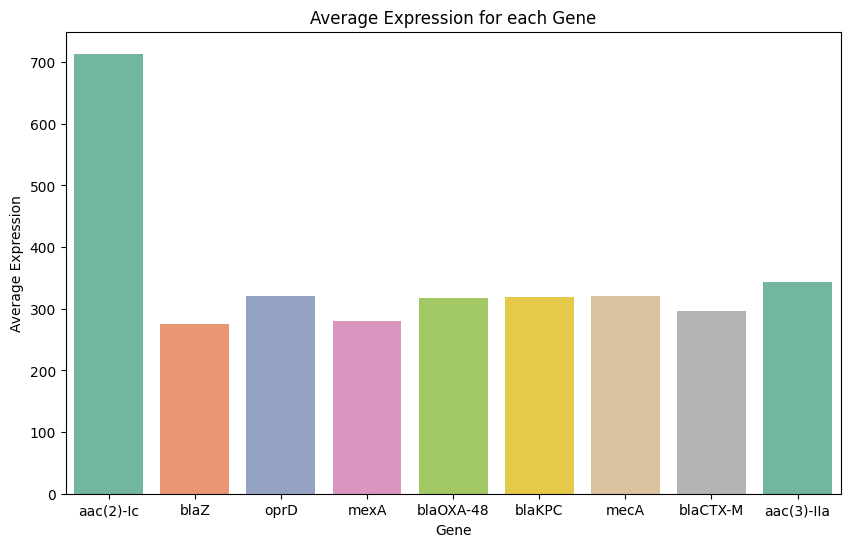

In [10]:
from collections import defaultdict
import matplotlib.pyplot as plt

def Mean_Expression(Values):
    Mean = sum(Values) / len(Values)
    return Mean

Expression = defaultdict(list)

for i, Row in Expression_w_Clinical.iterrows():
    Gene = Row['Gene']
    Level = Row['Expression Level']
    Expression[Gene].append(Level)
    Avg_Expression = {Gene: Mean_Expression(Levels) for Gene, Levels in Expression.items()}
    Avg_Expression_DF = pd.DataFrame(list(Avg_Expression.items()), columns = ['Gene', 'Average Expression'])

display(Avg_Expression_DF)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'Gene', y = 'Average Expression', data = Avg_Expression_DF,  hue = 'Gene', palette = 'Set2')
plt.title('Average Expression for each Gene')
plt.ylabel('Average Expression')
plt.xlabel('Gene')
plt.show()

plt.figure(figsize = (10, 6))
plt.bar(x = 'Gene', height = 'Average Expression', data = Avg_Expression_DF)
plt.title('Average Expression for each Gene')
plt.ylabel('Average Expression')
plt.xlabel('Gene')
plt.show()

,Unit,Average Expression
0,ICU-2,566.545748
1,ICU-3,594.540286
2,ICU-1,585.282857
3,PCU,552.910699
4,CCU,558.246866
5,ED,564.429621
6,Med-Surg,568.354706


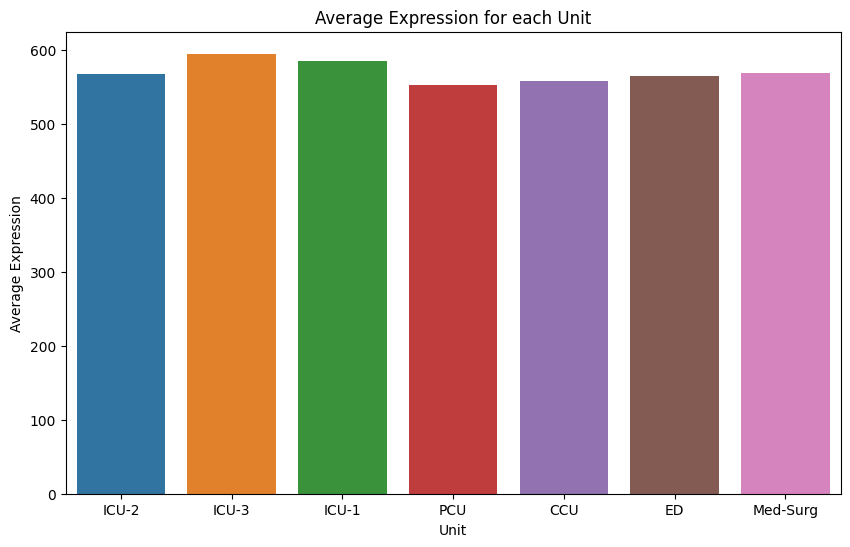

In [11]:
Expression = defaultdict(list)

for i, Row in Expression_w_Clinical.iterrows():
    Unit = Row['Unit']
    Level = Row['Expression Level']
    Expression[Unit].append(Level)
    Avg_Expression = {Unit: Mean_Expression(Levels) for Unit, Levels in Expression.items()}
    Avg_Expression_DF = pd.DataFrame(list(Avg_Expression.items()), columns = ['Unit', 'Average Expression'])

display(Avg_Expression_DF)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'Unit', y = 'Average Expression', data = Avg_Expression_DF,  hue = 'Unit')
plt.title('Average Expression for each Unit')
plt.ylabel('Average Expression')
plt.xlabel('Unit')
plt.show()

In [12]:
Pathogen_to_Gene = defaultdict(set)

for i, Row in Expression_w_Clinical.iterrows():
    Pathogen = Row['Strain']
    Gene = Row['Gene']
    Pathogen_to_Gene[Pathogen].add(Gene)

Pathogen_Gene_Map = pd.DataFrame([
    {'Pathgogen': Pathogen, 'Genes': Genes} for Pathogen, Genes in Pathogen_to_Gene.items()
])

display(Pathogen_Gene_Map)

,Pathgogen,Genes
0,Mycobacterium tuberculosis var. bovis AF2122/97,{aac(2)-Ic}
1,Methicillin-Resistant Staphylococcus aureus,"{mecA, blaZ}"
2,Pseudomonas aeruginosa,"{mecA, oprD, blaCTX-M, blaKPC, mexA, blaZ}"
3,Klebsiella pneumoniae,"{mecA, blaCTX-M, blaKPC, blaOXA-48, blaZ}"
4,Escherichia coli,"{oprD, blaCTX-M, aac(3)-IIa, blaKPC, mexA}"


In [13]:
from sklearn.preprocessing import LabelEncoder

encoded_df = Expression_w_Clinical.copy()
for col in ['Outcome', 'Diagnosis', 'Unit']:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))

# Compute correlations
correlation_matrix = encoded_df[['Outcome', 'Diagnosis', 'Unit']].corr()
print(correlation_matrix)

            Outcome  Diagnosis      Unit
Outcome    1.000000   0.379494  0.016193
Diagnosis  0.379494   1.000000 -0.012666
Unit       0.016193  -0.012666  1.000000


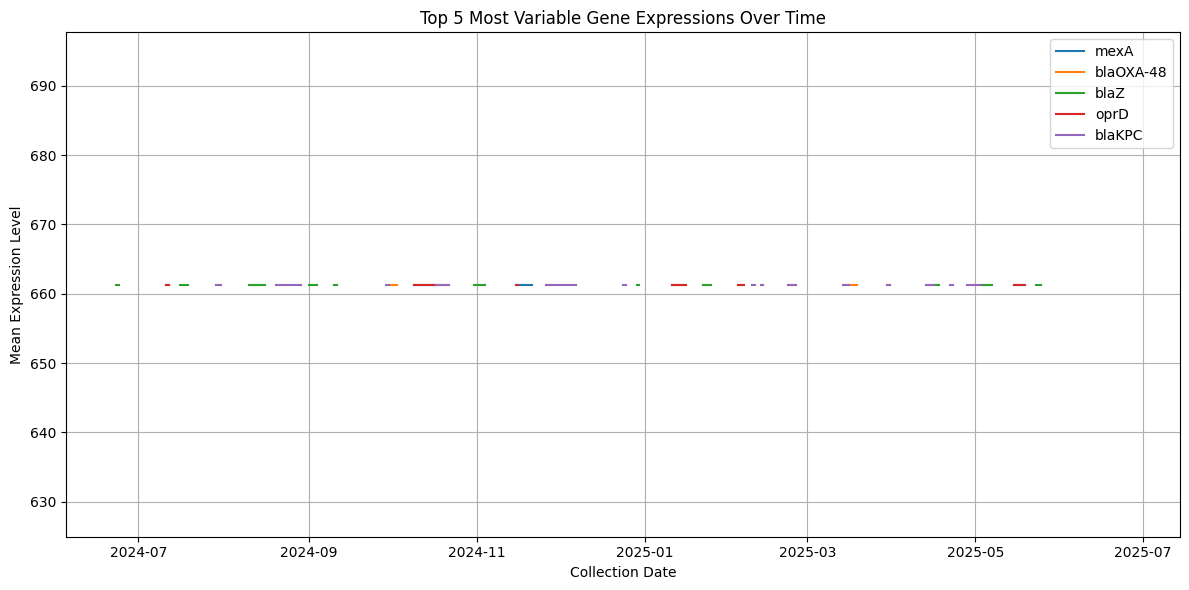

In [14]:
Expression_by_Time = defaultdict(lambda: defaultdict(list))

for i, Row in Expression_w_Clinical.iterrows():
    Date = Row['Collection Date']
    Expression = Row['Expression Level']
    Gene = Row['Gene']
    Expression_by_Time[Gene][Date].append(Level)

# Compute mean expression per gene per date
Gene_Time_Avg = {
    Gene: {Date: Mean_Expression(Levels) for Date, Levels in Date_Map.items()} for Gene, Date_Map in Expression_by_Time.items()
}


# Convert to time-indexed DataFrame
Timeline_DF = pd.DataFrame(Gene_Time_Avg).sort_index()

Top_Genes = Timeline_DF.std().sort_values(ascending=False).head(5).index
plt.figure(figsize=(12, 6))

for gene in Top_Genes:
    plt.plot(Timeline_DF.index, Timeline_DF[gene], label=gene)

plt.title(f"Top 5 Most Variable Gene Expressions Over Time")
plt.xlabel("Collection Date")
plt.ylabel("Mean Expression Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


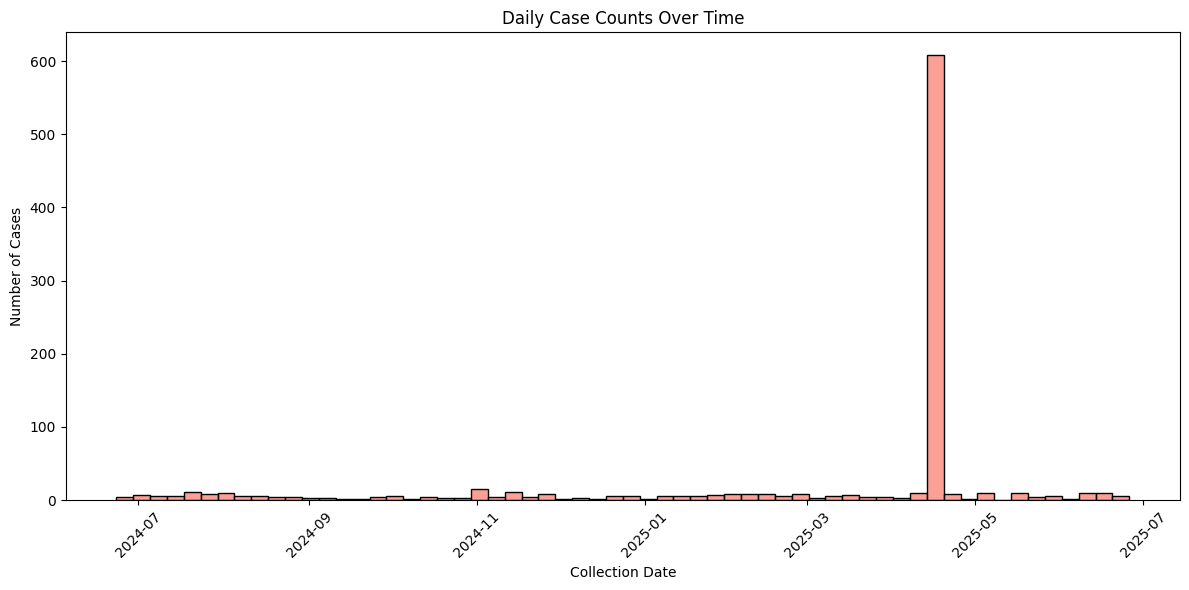

In [15]:
# Plot
plt.figure(figsize=(12, 6))
sns.histplot(Expression_w_Clinical['Collection Date'], bins=60, kde=False, color='salmon')
plt.title('Daily Case Counts Over Time')
plt.xlabel('Collection Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
